In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [291]:
bank_df=pd.read_csv("bank_marketing_part1_Data.csv")

In [292]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# 1.1 Read the data and do exploratory data analysis.
# Describe the data briefly.


In [293]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [294]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [295]:
bank_df.shape

(210, 7)

In [296]:
bank_df.duplicated().sum()

0

In [297]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

# Univariate Analysis

In [298]:
bank_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [299]:
listcolumns = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']

In [300]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(bank_df[column].describe(),end=' ')
    print('')
    print('')
    
       
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(bank_df[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=bank_df[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
----------------------------------------------------------------------------


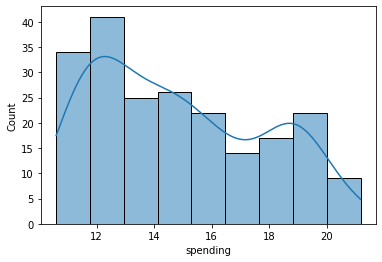

BoxPlot of spending
----------------------------------------------------------------------------


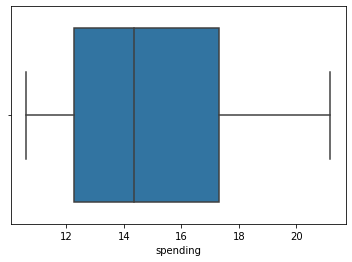

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
----------------------------------------------------------------------------


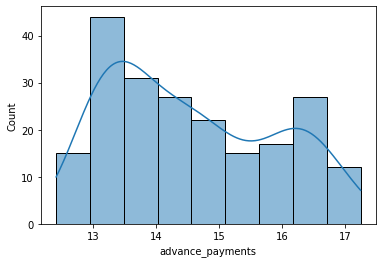

BoxPlot of advance_payments
----------------------------------------------------------------------------


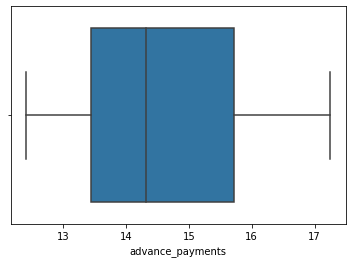

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


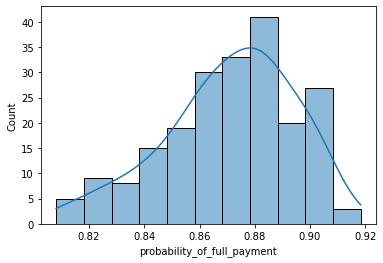

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


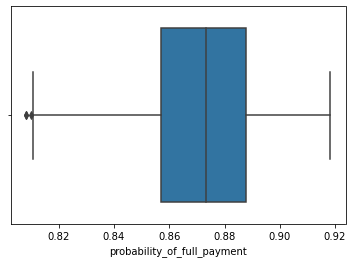

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
----------------------------------------------------------------------------


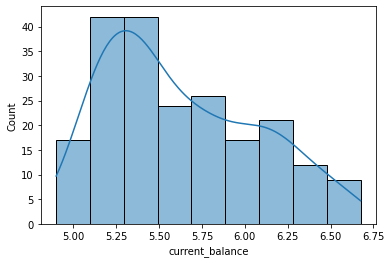

BoxPlot of current_balance
----------------------------------------------------------------------------


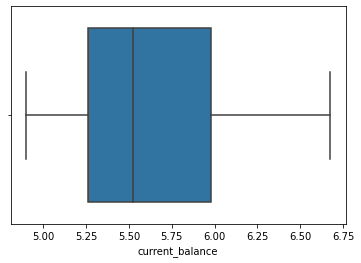

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
----------------------------------------------------------------------------


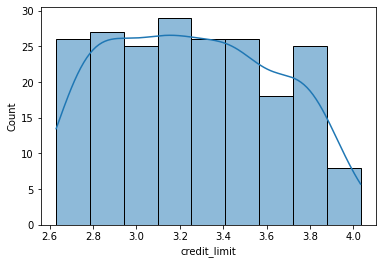

BoxPlot of credit_limit
----------------------------------------------------------------------------


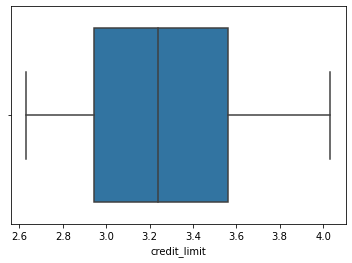

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
----------------------------------------------------------------------------


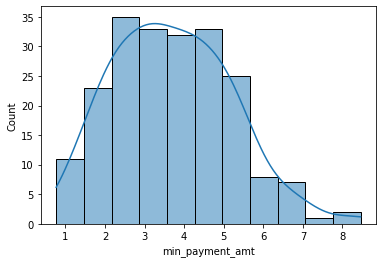

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


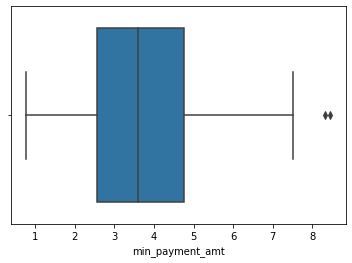

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


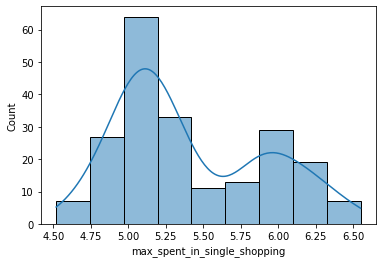

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


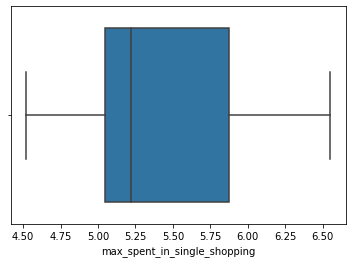

In [301]:
for x in listcolumns:
    univaranalysis(x,20)

# Multi variate Analysis (Bivariate Analysis)

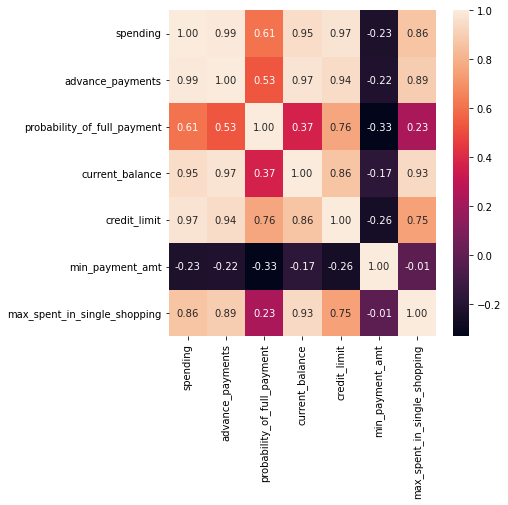

In [302]:
plt.figure(figsize=(6,6))
sns.heatmap(bank_df.corr(),annot=True,fmt=".2f");

<Figure size 288x288 with 0 Axes>

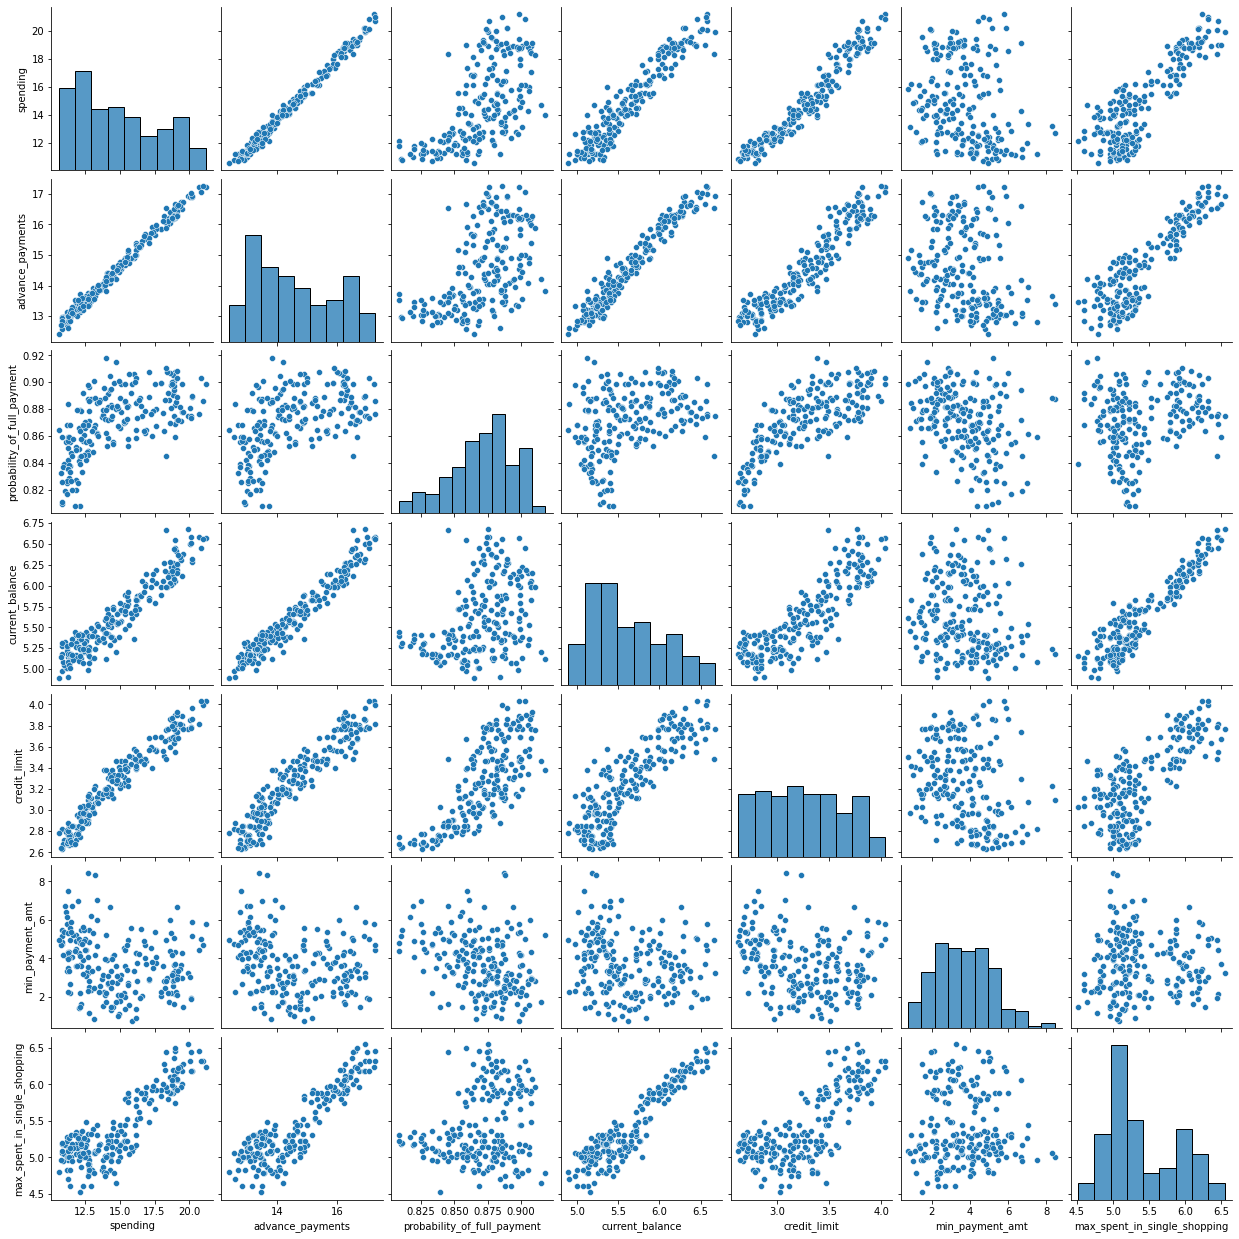

In [303]:
plt.figure(figsize=(4,4))
sns.pairplot(bank_df);

# Scaling of data

In [304]:
from sklearn.preprocessing import StandardScaler

In [305]:
scaler = StandardScaler()
scaled = scaler.fit_transform(bank_df)
scaled

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

# Clustering

In [306]:
from scipy.cluster.hierarchy import dendrogram, linkage

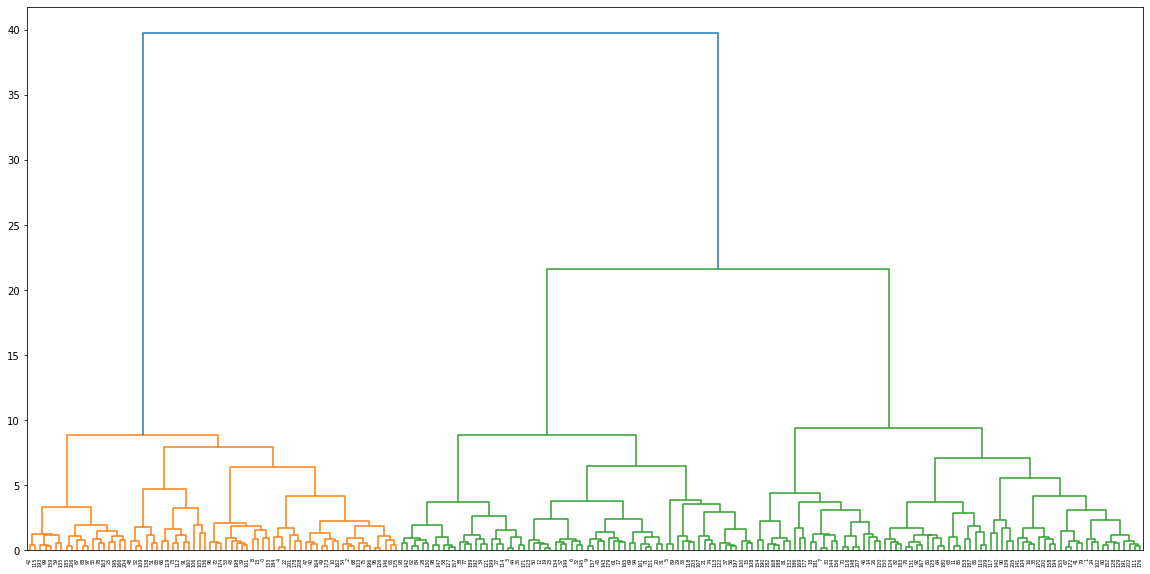

In [307]:
plt.figure(figsize=(20,10))
wardlink = linkage(scaled, method= 'ward')
dend = dendrogram (wardlink)

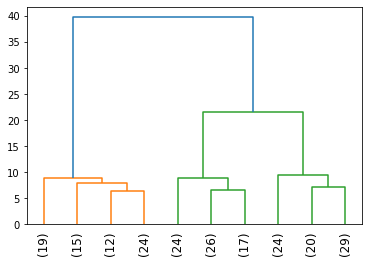

In [308]:
dend = dendrogram (wardlink,
                  truncate_mode='lastp',
                  p = 10,
                  leaf_rotation=90,
                  leaf_font_size=12)

In [309]:
from scipy.cluster.hierarchy import fcluster

In [310]:
#Method 1
clusters=fcluster(wardlink,2,criterion="maxclust")
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [311]:
#Method 2
clusters1=fcluster(wardlink,25,criterion= 'distance')
clusters1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [312]:
bank_df["clusters"]=clusters
bank_df.groupby("clusters").mean()
bank_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2


# Kmeans

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


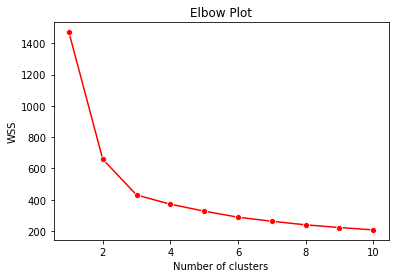

In [313]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =10)
    kmeans.fit(scaled)
    wss.append(kmeans.inertia_)
sns.lineplot(range(1,11), wss,marker='o',color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [314]:
#conda update -c conda-forge scikit-learn

In [315]:
# plotting silhouette curve using average silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
X, Y = make_blobs()

no_of_clusters= [2,3,4,5,6]

for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels= cluster.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print('for No. of clusters=', n_clusters, "The Average Silhouette Score is:", silhouette_avg)

for No. of clusters= 2 The Average Silhouette Score is: 0.697784801417457
for No. of clusters= 3 The Average Silhouette Score is: 0.7535154931697867
for No. of clusters= 4 The Average Silhouette Score is: 0.6429608585947133
for No. of clusters= 5 The Average Silhouette Score is: 0.48334973633935296
for No. of clusters= 6 The Average Silhouette Score is: 0.35371561861932976


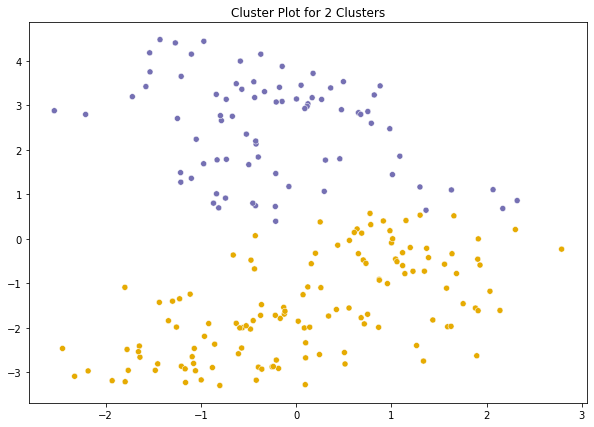

In [316]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled)
plt.figure(figsize=(10,7))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=
2, random_state=0).fit(bank_df).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 2 Clusters')
plt.show()

# Problem 2: CART-RF-ANN

In [317]:
insurance_df=pd.read_csv("insurance_part2_data.csv")

In [318]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [319]:
insurance_df.shape

(3000, 10)

In [320]:
insurance_df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [321]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [322]:
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [323]:
#  Are there any duplicates
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
insurance_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [324]:
# Removing duplicates
insurance_df.drop_duplicates(inplace=True) 
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(insurance_df.shape)

Number of duplicate rows = 0
(2861, 10)


In [325]:
insurance_df = insurance_df.drop(["Agency_Code"],axis=1)
insurance_df.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# Check for outliers

<AxesSubplot:>

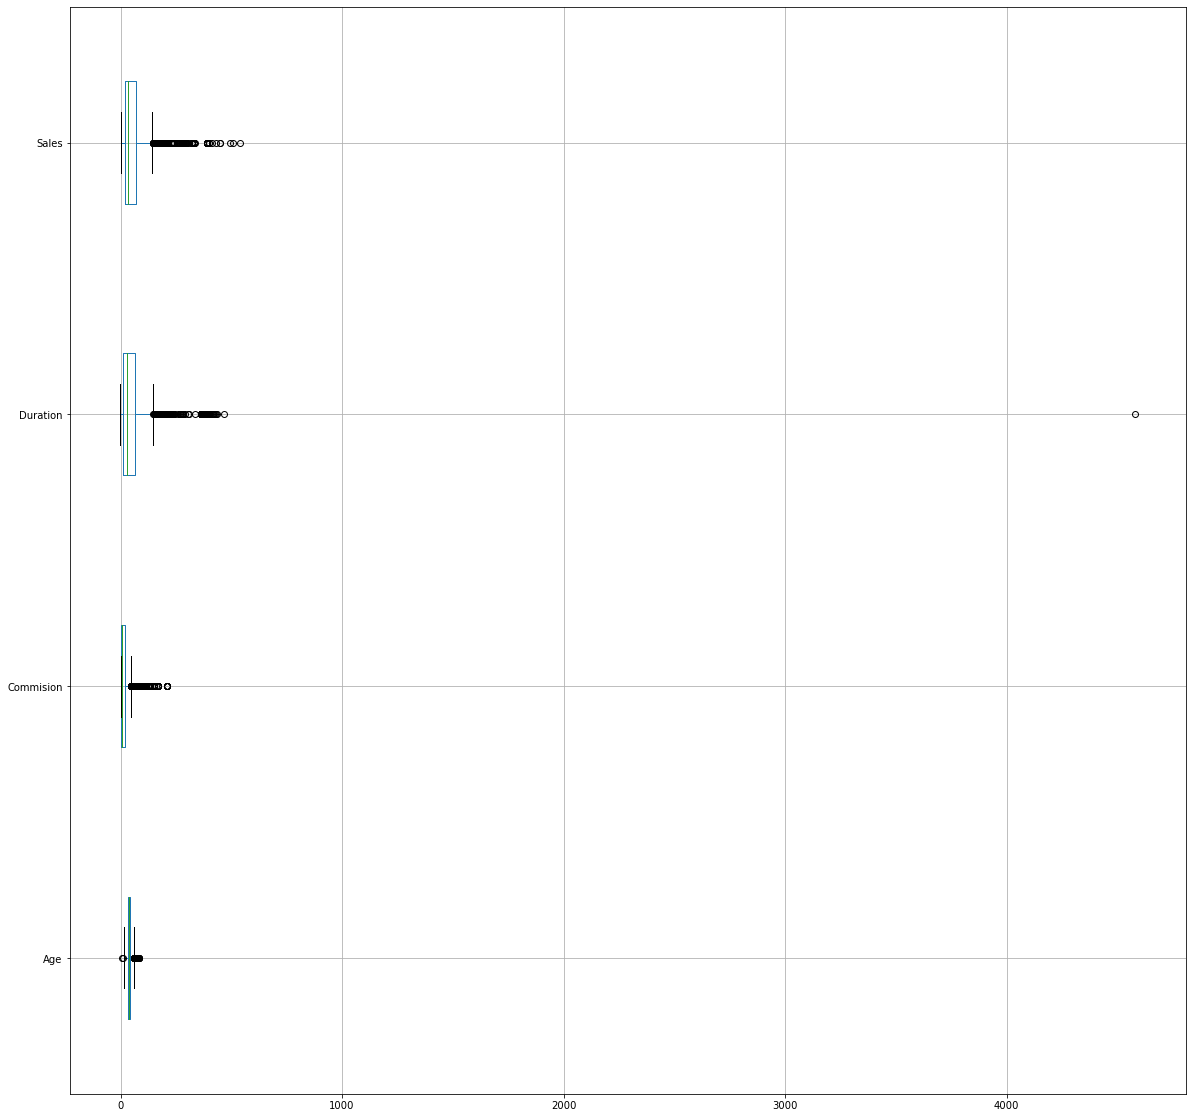

In [326]:
plt.figure(figsize=(20,20))
insurance_df[["Age","Commision","Duration","Sales"]].boxplot(vert=0)                                               

# Univariate Analysis

In [327]:
insurance_df.columns

Index(['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

In [328]:
listcolumns = ['Age', 'Commision', 'Duration', 'Sales']

In [329]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(insurance_df[column].describe(),end=' ')
    print('')
    print('')
        
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(insurance_df[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=insurance_df[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
----------------------------------------------------------------------------


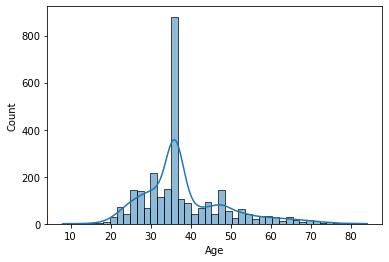

BoxPlot of Age
----------------------------------------------------------------------------


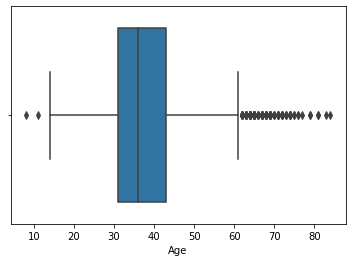

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
----------------------------------------------------------------------------


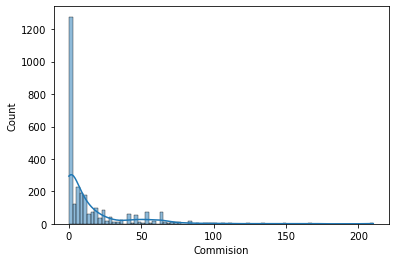

BoxPlot of Commision
----------------------------------------------------------------------------


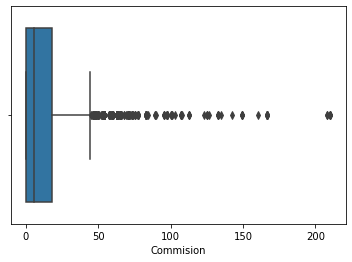

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
----------------------------------------------------------------------------


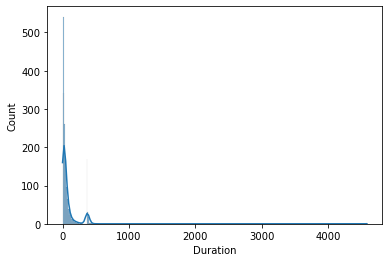

BoxPlot of Duration
----------------------------------------------------------------------------


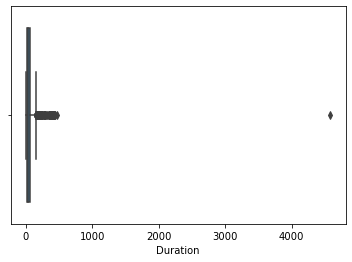

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
----------------------------------------------------------------------------


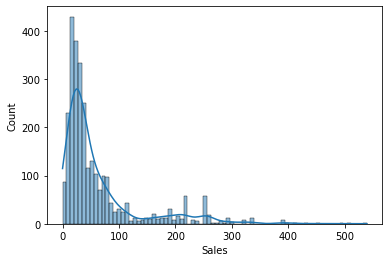

BoxPlot of Sales
----------------------------------------------------------------------------


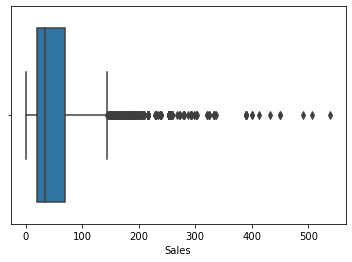

In [330]:
for x in listcolumns:
    univaranalysis(x,20)

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


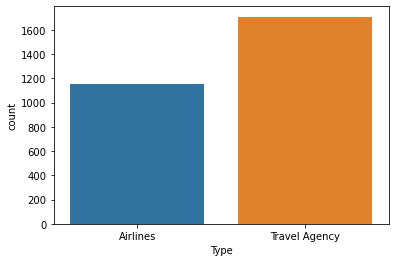

In [331]:
sns.countplot(insurance_df ['Type']); #'Claimed', 'Channel', 'Product Name', 'Destination']);

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


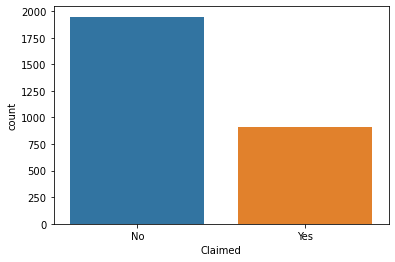

In [332]:
sns.countplot(insurance_df ['Claimed']);

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


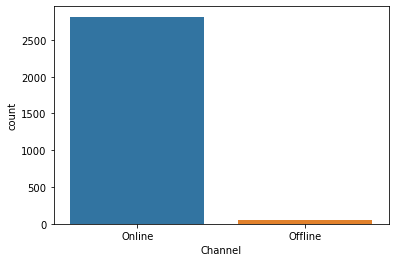

In [333]:
sns.countplot(insurance_df ['Channel']);

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Customised Plan'),
  Text(1, 0, 'Cancellation Plan'),
  Text(2, 0, 'Bronze Plan'),
  Text(3, 0, 'Silver Plan'),
  Text(4, 0, 'Gold Plan')])

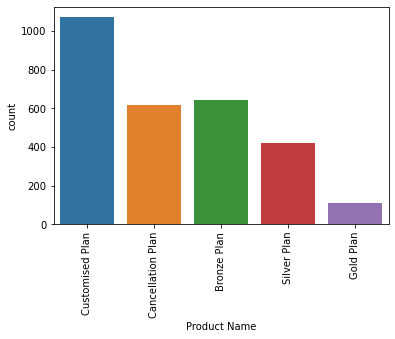

In [334]:
sns.countplot(insurance_df ['Product Name']);
plt.xticks(rotation=90)

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


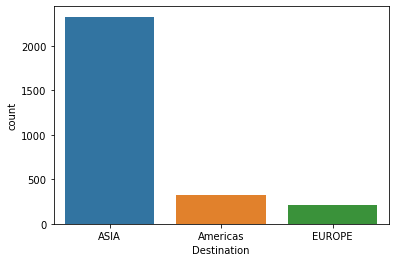

In [335]:
sns.countplot(insurance_df ['Destination']);

In [336]:
Q1 = insurance_df.quantile(0.25)
Q3 = insurance_df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)

Age          12.00
Commision    17.82
Duration     54.00
Sales        49.30
dtype: float64


In [337]:
insurance_df = insurance_df [~((insurance_df < (Q1 - 1.5 * IQR))| (insurance_df > (Q3 + 1.5 * IQR))).any(axis=1)]
insurance_df.shape

C:\Users\Samsung\AppData\Local\Temp/ipykernel_10376/2002163780.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  insurance_df = insurance_df [~((insurance_df < (Q1 - 1.5 * IQR))| (insurance_df > (Q3 + 1.5 * IQR))).any(axis=1)]


(2216, 9)

In [338]:
insurance_df.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# Multi variate Analysis (Bivariate Analysis)

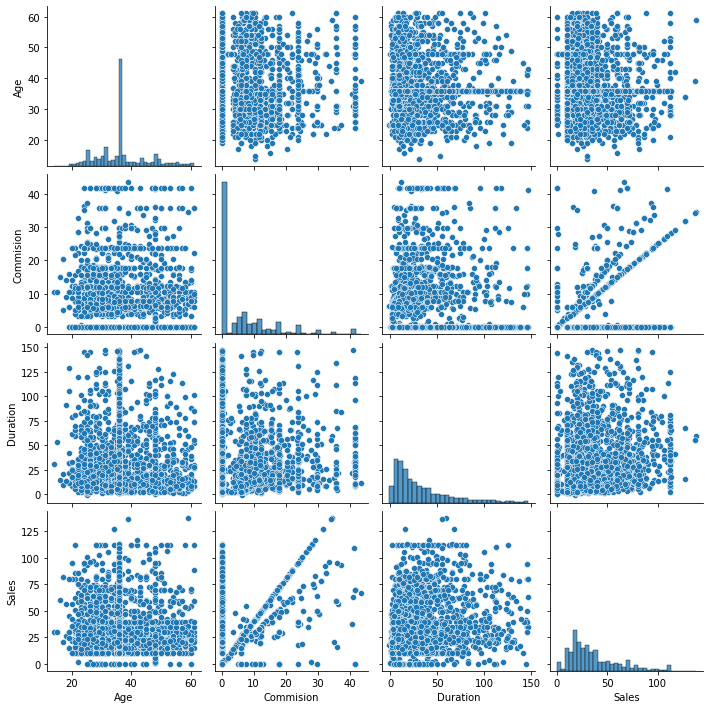

In [339]:
sns.pairplot(insurance_df)

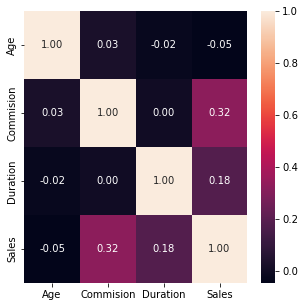

In [340]:
plt.figure(figsize=(5,5))
sns.heatmap(insurance_df.corr(),annot=True,fmt=".2f");

In [341]:
# Converting ‘object’ datatype to ‘int’

In [342]:
for feature in insurance_df.columns: 
     if insurance_df[feature].dtype == 'object':
            insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes


In [343]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2216 non-null   int64  
 1   Type          2216 non-null   int8   
 2   Claimed       2216 non-null   int8   
 3   Commision     2216 non-null   float64
 4   Channel       2216 non-null   int8   
 5   Duration      2216 non-null   int64  
 6   Sales         2216 non-null   float64
 7   Product Name  2216 non-null   int8   
 8   Destination   2216 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 161.9 KB


In [344]:
insurance_df.columns

Index(['Age', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

In [345]:
# another method of univariant analysis
listcolumns1= ['Type','Claimed', 'Channel', 'Product Name', 'Destination'];

In [346]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(insurance_df[column].describe(),end=' ')
    print('')
    print('')
        
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(insurance_df[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=insurance_df[column])
    plt.show()

Description of Type
----------------------------------------------------------------------------
count    2216.000000
mean        0.633123
std         0.482061
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Type, dtype: float64 

Distribution of Type
----------------------------------------------------------------------------


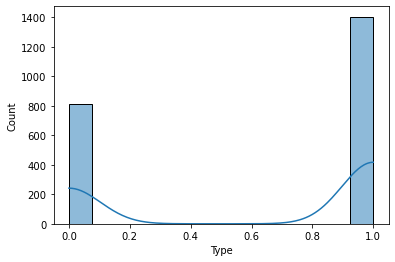

BoxPlot of Type
----------------------------------------------------------------------------


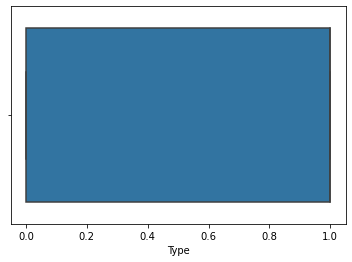

Description of Claimed
----------------------------------------------------------------------------
count    2216.000000
mean        0.269404
std         0.443750
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Claimed, dtype: float64 

Distribution of Claimed
----------------------------------------------------------------------------


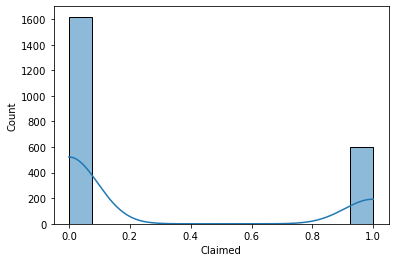

BoxPlot of Claimed
----------------------------------------------------------------------------


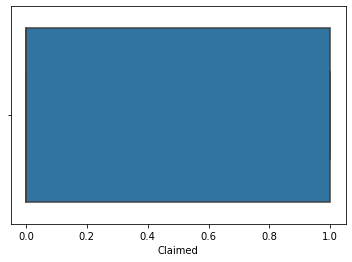

Description of Channel
----------------------------------------------------------------------------
count    2216.000000
mean        0.987816
std         0.109732
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Channel, dtype: float64 

Distribution of Channel
----------------------------------------------------------------------------


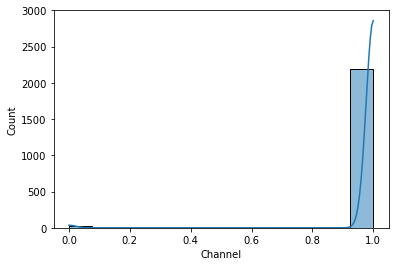

BoxPlot of Channel
----------------------------------------------------------------------------


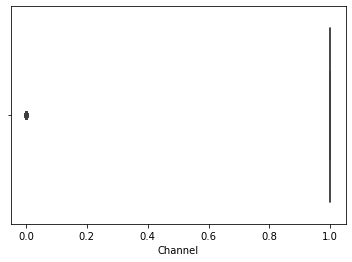

Description of Product Name
----------------------------------------------------------------------------
count    2216.000000
mean        1.444043
std         1.157381
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Product Name, dtype: float64 

Distribution of Product Name
----------------------------------------------------------------------------


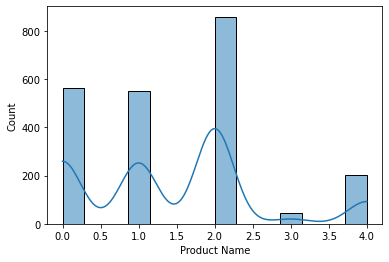

BoxPlot of Product Name
----------------------------------------------------------------------------


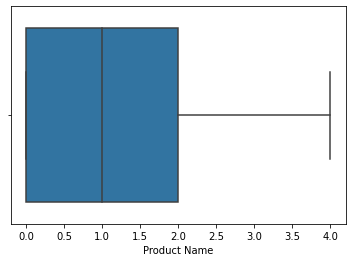

Description of Destination
----------------------------------------------------------------------------
count    2216.000000
mean        0.233303
std         0.568703
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Destination, dtype: float64 

Distribution of Destination
----------------------------------------------------------------------------


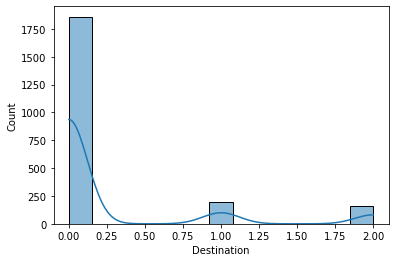

BoxPlot of Destination
----------------------------------------------------------------------------


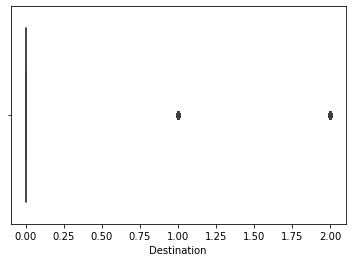

In [347]:
for x in listcolumns1:
    univaranalysis(x,20)

In [348]:
# Splitting Dataset in Train and Test Data (70:30)

x=insurance_df.drop("Claimed",axis=1)
y=insurance_df.pop("Claimed")

In [349]:
x.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0.70,1,7,2.51,2,0
1,36,1,0.00,1,34,20.00,2,0
2,39,1,5.94,1,3,9.90,2,1
3,36,1,0.00,1,4,26.00,1,0
4,33,0,6.30,1,53,18.00,0,0


In [350]:
from sklearn.model_selection import train_test_split
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=10)

In [351]:
# checking dimensions
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (1551, 8)
x_test (665, 8)
train_labels (1551,)
test_labels (665,)


In [352]:
from sklearn.tree import DecisionTreeClassifier

In [353]:
insurance_model=DecisionTreeClassifier(criterion='gini')
insurance_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [354]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
train_char_labels=["No","Yes"]
claimed_tree_file=open("D:\claimed_tree_file.dot","w")
dot_data=tree.export_graphviz(insurance_model,out_file=claimed_tree_file,feature_names=list(x_train), class_names = list(train_char_labels))
claimed_tree_file.close()

In [355]:
print (pd.DataFrame(insurance_model.feature_importances_, columns = ["Imp"], index= x_train.columns))

                   Imp
Age           0.203912
Type          0.001828
Commision     0.197946
Channel       0.005016
Duration      0.298814
Sales         0.210403
Product Name  0.060475
Destination   0.021606


In [356]:
# Finding Best Parameters using best grid
param_grid = {
 'criterion': ['gini'],
 'max_depth': [10,12,14,15],
 'min_samples_leaf': [90,100,110], 
 'min_samples_split': [310,300,295],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)


In [357]:
grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 90, 'min_samples_split': 310}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=90, min_samples_split=310,
                       random_state=1)

In [358]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [362]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head(10)


,0,1
0,0.672414,0.327586
1,0.672414,0.327586
2,0.929630,0.070370
3,0.579909,0.420091
4,0.852000,0.148000
5,0.672414,0.327586
6,0.579909,0.420091
7,0.579909,0.420091
8,0.852000,0.148000
9,0.852000,0.148000


In [366]:
ytrain_predictscore = best_grid.predict_proba(x_train)
ytest_predictscore = best_grid.predict_proba(x_test)

In [367]:
ytrain_predictscore

array([[0.852     , 0.148     ],
       [0.57990868, 0.42009132],
       [0.42696629, 0.57303371],
       ...,
       [0.98019802, 0.01980198],
       [0.92962963, 0.07037037],
       [0.95934959, 0.04065041]])

In [368]:
ytest_predictscore

array([[0.67241379, 0.32758621],
       [0.67241379, 0.32758621],
       [0.92962963, 0.07037037],
       ...,
       [0.852     , 0.148     ],
       [0.67241379, 0.32758621],
       [0.47959184, 0.52040816]])

In [369]:
ytrain_predictscore[:,1]

array([0.148     , 0.42009132, 0.57303371, ..., 0.01980198, 0.07037037,
       0.04065041])

In [370]:
ytest_predictscore[:,1]

array([0.32758621, 0.32758621, 0.07037037, 0.42009132, 0.148     ,
       0.32758621, 0.42009132, 0.42009132, 0.148     , 0.148     ,
       0.32758621, 0.52040816, 0.01980198, 0.52040816, 0.01980198,
       0.52040816, 0.07037037, 0.07037037, 0.07037037, 0.04065041,
       0.07037037, 0.32758621, 0.57303371, 0.57303371, 0.01980198,
       0.07037037, 0.07037037, 0.07037037, 0.07037037, 0.148     ,
       0.148     , 0.148     , 0.57303371, 0.42009132, 0.57303371,
       0.2826087 , 0.2826087 , 0.07037037, 0.52040816, 0.148     ,
       0.01980198, 0.07037037, 0.148     , 0.32758621, 0.57303371,
       0.52040816, 0.07037037, 0.2826087 , 0.148     , 0.32758621,
       0.01980198, 0.57303371, 0.52040816, 0.2826087 , 0.04065041,
       0.07037037, 0.01980198, 0.148     , 0.01980198, 0.42009132,
       0.04065041, 0.2826087 , 0.01980198, 0.2826087 , 0.42009132,
       0.57303371, 0.57303371, 0.57303371, 0.07037037, 0.42009132,
       0.07037037, 0.148     , 0.148     , 0.148     , 0.28260

In [378]:
from sklearn.metrics import classification_report, confusion_matrix

In [372]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1147
           1       0.55      0.38      0.45       404

    accuracy                           0.76      1551
   macro avg       0.68      0.64      0.65      1551
weighted avg       0.74      0.76      0.74      1551



In [379]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       472
           1       0.66      0.39      0.49       193

    accuracy                           0.77       665
   macro avg       0.72      0.66      0.67       665
weighted avg       0.75      0.77      0.74       665



In [380]:
confusion_matrix(train_labels, ytrain_predict)

array([[1024,  123],
       [ 251,  153]], dtype=int64)

In [383]:
confusion_matrix(test_labels, ytest_predict)

array([[433,  39],
       [117,  76]], dtype=int64)

In [384]:
#Train Data Accuracy
insurance_train_acc=best_grid.score(x_train,train_labels) 
insurance_train_acc

0.7588652482269503

In [385]:
#Test Data Accuracy
insurance_test_acc=best_grid.score(x_test,test_labels) 
insurance_test_acc

0.7654135338345864

In [425]:
x.shape

(2216, 8)

In [426]:
y.shape

(2216,)

In [423]:
# Model Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = best_grid.predict_proba(x_train)
probs = probs[:, 1]
# calculate AUC of train data
insurance_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % insurance_train_auc)


AUC: 0.629


In [424]:
# calculate roc curve
insurance_test_fpr, insurance_test_tpr,insurance_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(insurance_test_fpr, insurance_test_tpr)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [665, 1551]

In [377]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = best_grid.predict_proba(x_test)
probs = probs[:, 1]
# calculate AUC of test data
insurance_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % insurance_test_auc)


AUC: 0.783


# Random Forest Classifier

In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 7],
    'max_features': [4, 5],
    'min_samples_leaf': [25, 30],
    'min_samples_split': [20, 30],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [392]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7], 'max_features': [4, 5],
                         'min_samples_leaf': [25, 30],
                         'min_samples_split': [20, 30],
                         'n_estimators': [101, 301]})

In [393]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 30,
 'n_estimators': 301}

In [394]:
best_grid = grid_search.best_estimator_

In [395]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [396]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1147
           1       0.69      0.35      0.46       404

    accuracy                           0.79      1551
   macro avg       0.75      0.65      0.67      1551
weighted avg       0.78      0.79      0.76      1551



In [397]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       472
           1       0.73      0.33      0.46       193

    accuracy                           0.77       665
   macro avg       0.75      0.64      0.65       665
weighted avg       0.76      0.77      0.74       665



In [398]:
confusion_matrix(train_labels,ytrain_predict)

array([[1085,   62],
       [ 264,  140]], dtype=int64)

In [399]:
rf_train_acc=best_grid.score(x_train,train_labels) 
rf_train_acc


0.7898130238555771

Area under Curve is 0.8229701675485771


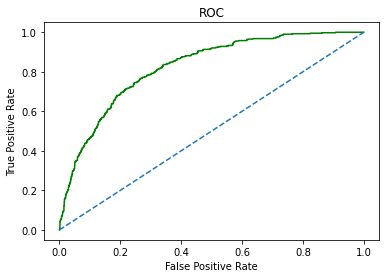

In [400]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [401]:
confusion_matrix(test_labels,ytest_predict)

array([[448,  24],
       [129,  64]], dtype=int64)

In [402]:
rf_test_acc=best_grid.score(x_test,test_labels)
rf_test_acc

0.7699248120300752

Area under Curve is 0.8058860981821375


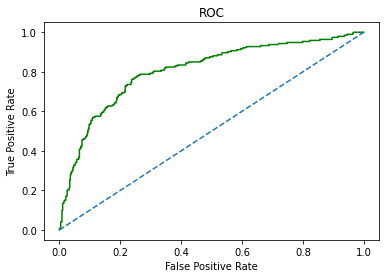

In [403]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)


# Artificial Neural Network (ANN)

In [407]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_trains = sc.fit_transform(x_train) 
x_tests = sc.transform (x_test)

In [408]:
param_grid = {
    'hidden_layer_sizes': [(500)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.0001],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [409]:
grid_search.fit(x_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'], 'hidden_layer_sizes': [500],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.0001]})

In [410]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 500,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.0001}

In [411]:
best_grid = grid_search.best_estimator_

In [413]:
ytrain_predict = best_grid.predict(x_trains)
ytest_predict = best_grid.predict(x_tests)

In [414]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1147
           1       0.70      0.50      0.58       404

    accuracy                           0.81      1551
   macro avg       0.77      0.71      0.73      1551
weighted avg       0.80      0.81      0.80      1551



In [415]:
confusion_matrix(train_labels,ytrain_predict)


array([[1061,   86],
       [ 202,  202]], dtype=int64)

In [416]:
nn_train_acc=best_grid.score(x_train,train_labels) 
nn_train_acc

0.27852998065764023

Area under Curve is 0.628982623632895


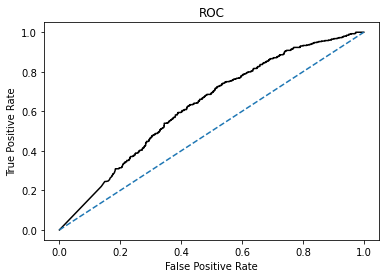

In [417]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [418]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       472
           1       0.65      0.41      0.50       193

    accuracy                           0.76       665
   macro avg       0.72      0.66      0.67       665
weighted avg       0.75      0.76      0.75       665



In [419]:
confusion_matrix(test_labels,ytest_predict)

array([[428,  44],
       [113,  80]], dtype=int64)

In [420]:
nn_test_acc=best_grid.score(x_test,test_labels)
nn_test_acc


0.3097744360902256

Area under Curve is 0.6010198032844472


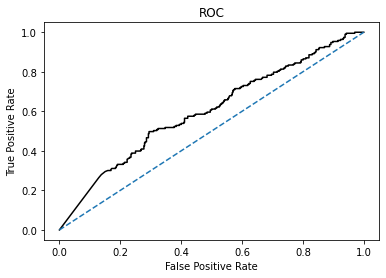

In [421]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)


NameError: name 'insurance_train_fpr' is not defined

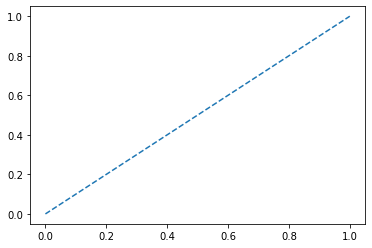

AUC: 0.777
